In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Data Overview

In [3]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 7043
Number of Columns: 21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Observations 
We can see that TotalCharges is the only column that contains any missing values. Also our dataset is mostly comprised of string columns with few being either ints or floats. 

# Data Precrocessing 

In [5]:
import matplotlib.pyplot as plt

In [6]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [7]:
Cat_col=[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
         'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
categorical= df[Cat_col]
categorical

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [8]:
from sklearn.preprocessing import LabelEncoder
cat=categorical.copy()
encoder=LabelEncoder()
need_encoding=list(cat.drop(columns=['SeniorCitizen']).columns)
for col in need_encoding:
    df[col]=encoder.fit_transform(df[col])
df=df.drop(columns=['customerID'])

# Data Visualization/Exploration

In [9]:
print("\n" + "="*30)
print("Churn Counts")
print("\n" + "="*30)
print(df['Churn'].value_counts())

print("\n" + "="*30)
print("Churn Prop")
print("\n" + "="*30)
print(df['Churn'].value_counts() / len(df))



Churn Counts

Churn
0    5174
1    1869
Name: count, dtype: int64

Churn Prop

Churn
0    0.73463
1    0.26537
Name: count, dtype: float64


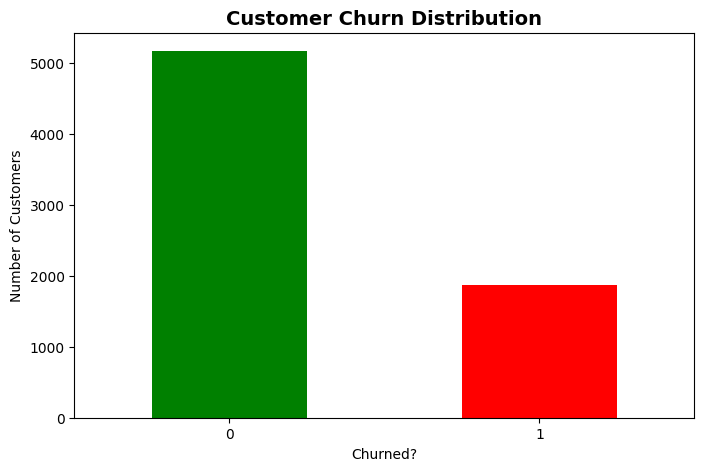

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churned?')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.savefig('churn_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [11]:
corr = df.corr(numeric_only=True)

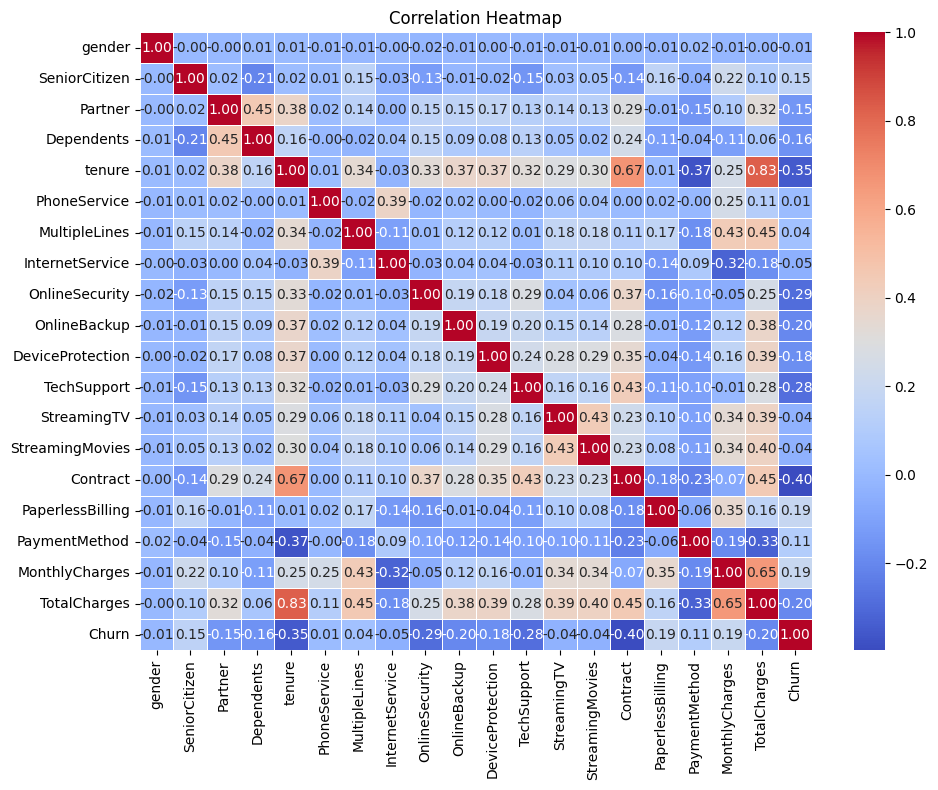

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


<Figure size 1000x600 with 0 Axes>

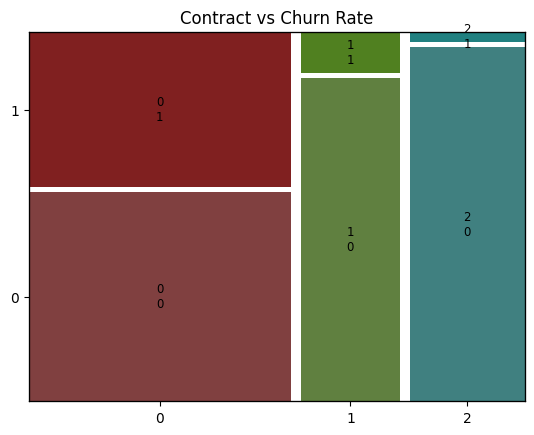

<Figure size 1000x600 with 0 Axes>

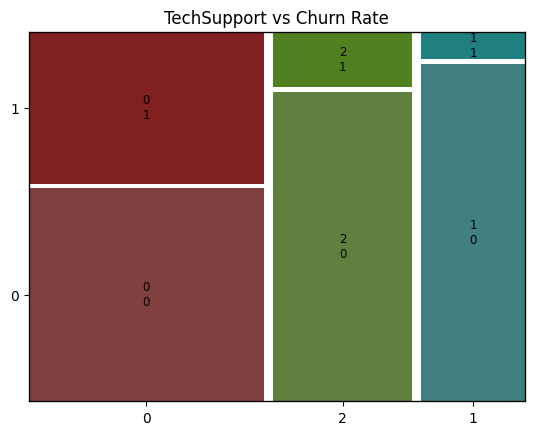

<Figure size 1000x600 with 0 Axes>

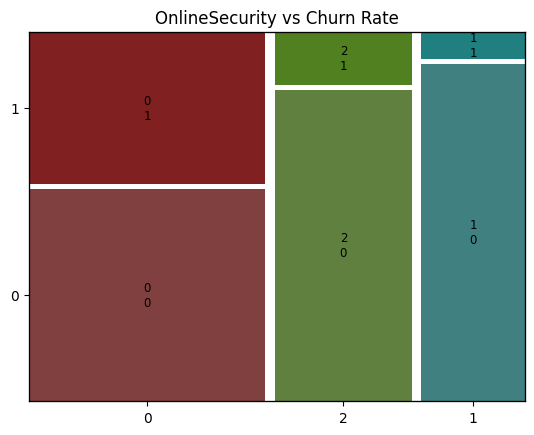

In [14]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

cols = ['Contract', 'TechSupport', 'OnlineSecurity']

for col in cols:
    plt.figure(figsize=(10, 6))

    def labelizer(key):
        category = key[0]
        churn_val = key[1]

        subset = df[df[col] == category]
        if len(subset) == 0:
            return ""

        churn_rate = (subset['Churn'] == churn_val).mean()
        return f"{churn_rate:.1%}"

    mosaic(
        df,
        [col, 'Churn'],
        title=f'{col} vs Churn Rate',
        gap=0.02
    )
    plt.show()


In [15]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Numerical Feature Analysis

In [16]:
numerical=df[['tenure','MonthlyCharges','TotalCharges']]
numerical

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60



Numerical columns hist


Text(0.5, 0, 'Total Charges ($)')

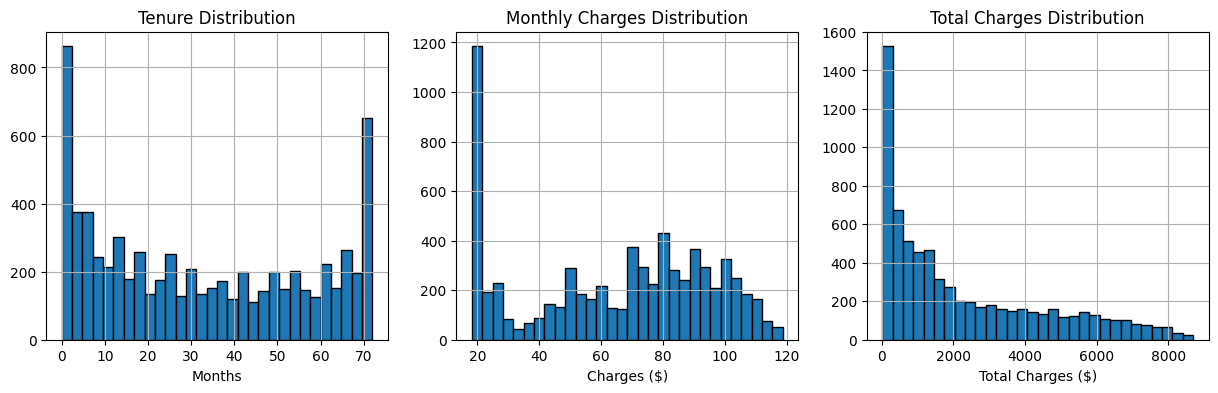

In [17]:
print("\n" + "="*60)
print("Numerical columns hist")
print("="*60)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
df['tenure'].hist(bins=30, ax=axes[0], edgecolor='black')
axes[0].set_title('Tenure Distribution')
axes[0].set_xlabel('Months')

df['MonthlyCharges'].hist(bins=30, ax=axes[1], edgecolor='black')
axes[1].set_title('Monthly Charges Distribution')
axes[1].set_xlabel('Charges ($)')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].hist(bins=30, ax=axes[2], edgecolor='black')
axes[2].set_title('Total Charges Distribution')
axes[2].set_xlabel('Total Charges ($)')

In [18]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTrain size: {X_train.shape[0]} samples")
print(f"Test size:  {X_test.shape[0]} samples")



Train size: 5634 samples
Test size:  1409 samples


In [19]:
import numpy as np
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler


In [20]:

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(X)
print(f"KMO Score: {kmo_model:.4f}")
if kmo_model >= 0.6:
    print("✅ PCA is appropriate for this dataset")
else:
    print("❌ PCA is NOT appropriate for this dataset")

KMO Score: 0.7124
✅ PCA is appropriate for this dataset


In [21]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(X)
print(f"Chi-square value: {chi_square_value:.4f}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("✅ Variables are correlated - PCA is appropriate")
else:
    print("❌ Variables are NOT sufficiently correlated - PCA may not help")

Chi-square value: 44736.1497
P-value: 0.0
✅ Variables are correlated - PCA is appropriate


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"Original features: {X_train.shape[1]}")
print(f"PCA components: {X_train_pca.shape[1]}")
print(f"Variance explained: {pca.explained_variance_ratio_.sum():.4f}")

Original features: 19
PCA components: 16
Variance explained: 0.9702


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1035
           1       0.61      0.56      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

ROC-AUC Score: 0.8368


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("="*60)
print("LOGISTIC REGRESSION WITH PCA")
print("="*60)

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_reg.fit(X_train_pca, y_train)

y_pred_lr = log_reg.predict(X_test_pca)
y_proba_lr = log_reg.predict_proba(X_test_pca)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba_lr):.4f}")

LOGISTIC REGRESSION WITH PCA

Confusion Matrix:
[[721 314]
 [ 74 300]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.49      0.80      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.72      0.74      1409


ROC-AUC Score: 0.8263


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
model2 = RandomForestClassifier(
    n_estimators=50,  
    n_jobs=-1
)

model2.fit(X_train, y_train)
forrest_pred = model2.predict(X_test)
forrest_proba = model2.predict_proba(X_test)[:, 1]

print(classification_report(y_test, forrest_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, forrest_proba):.4f}")

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


ROC-AUC Score: 0.8215


In [27]:
rf_optimized = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_optimized.fit(X_train, y_train)
rf_opt_pred = rf_optimized.predict(X_test)
rf_opt_proba = rf_optimized.predict_proba(X_test)[:, 1]

print(classification_report(y_test, rf_opt_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_opt_proba):.4f}")


              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1035
           1       0.58      0.63      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409

ROC-AUC Score: 0.8344


In [28]:
rf_optimized = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_optimized.fit(X_train_pca, y_train)
rf_opt_pred = rf_optimized.predict(X_test_pca)
rf_opt_proba = rf_optimized.predict_proba(X_test_pca)[:, 1]
print(classification_report(y_test, rf_opt_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_opt_proba):.4f}")


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.58      0.54      0.56       374

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409

ROC-AUC Score: 0.8098


In [29]:
from sklearn.ensemble import RandomForestClassifier

print("\n" + "="*60)
print("RANDOM FOREST WITH PCA")
print("="*60)

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  
)

rf.fit(X_train_pca, y_train)

y_pred_rf = rf.predict(X_test_pca)
y_proba_rf = rf.predict_proba(X_test_pca)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")


RANDOM FOREST WITH PCA

Confusion Matrix:
[[923 112]
 [214 160]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1035
           1       0.59      0.43      0.50       374

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.75      0.77      0.76      1409


ROC-AUC Score: 0.7959


In [30]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
imbalance= (len(y_train)-y_train.sum())/y_train.sum()
advanced_model = xgb.XGBClassifier(scale_pos_weight=imbalance,random_state=42,eval_metric='auc')
param_grid = {
    'n_estimators': [50,100,150,200,250],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.001,0.01, 0.1,1],
}
search = GridSearchCV(advanced_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
search.fit(X_train, y_train)
best_search=search.best_estimator_
xgb_proba = best_search.predict_proba(X_test)[:, 1]
xgb_pred = best_search.predict(X_test)
print(classification_report(y_test,xgb_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb_proba):.4f}")

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

ROC-AUC Score: 0.8451


In [31]:
print("\n" + "="*60)
print("GRIDSEARCH CV - XGBOOST WITH PCA")
print("="*60)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Scale pos weight: {scale_pos_weight:.2f}\n")

param_grid_xgb = {
    'n_estimators': [50,100,150,200,250],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.001,0.01, 0.1,1],
}

grid_xgb = GridSearchCV(
    xgb.XGBClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss'
    ),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train_pca, y_train)

print(f"\nBest Parameters: {grid_xgb.best_params_}")
print(f"Best Cross-Validation Score: {grid_xgb.best_score_:.4f}")

y_pred_grid_xgb = grid_xgb.predict(X_test_pca)
y_proba_grid_xgb = grid_xgb.predict_proba(X_test_pca)[:, 1]

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_grid_xgb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_grid_xgb):.4f}")


GRIDSEARCH CV - XGBOOST WITH PCA
Scale pos weight: 2.77

Fitting 5 folds for each of 80 candidates, totalling 400 fits

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Cross-Validation Score: 0.8302

Test Set Performance:
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409

ROC-AUC Score: 0.8274


In [32]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Scale pos weight: {scale_pos_weight:.2f}")

xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    min_child_weight=5,
    scale_pos_weight=scale_pos_weight, 
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, xgb_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb_proba):.4f}")

Scale pos weight: 2.77
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.74      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409

ROC-AUC Score: 0.8368


In [33]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Scale pos weight: {scale_pos_weight:.2f}")

xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    min_child_weight=5,
    scale_pos_weight=scale_pos_weight, 
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train_pca, y_train)
xgb_pred = xgb_model.predict(X_test_pca)
xgb_proba = xgb_model.predict_proba(X_test_pca)[:, 1]

print(classification_report(y_test, xgb_pred))

print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb_proba):.4f}")

Scale pos weight: 2.77
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1035
           1       0.54      0.69      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.76      0.77      1409

ROC-AUC Score: 0.8197


In [34]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

y_pred_proba_nn = model.predict(X_test_scaled).flatten()
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

print("\n" + "="*60)
print("NEURAL NETWORK RESULTS")
print("="*60)
print(classification_report(y_test,y_pred_nn))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_nn):.4f}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

NEURAL NETWORK RESULTS
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1035
           1       0.60      0.59      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409

ROC-AUC Score: 0.8372
